We are taking a database from the Union of Concerned Scientists which contains every satellite currently in orbit. We will then clean and filter the data set and complete analyses over this dataset.

### Importing Datasets

Union of Concerned Scientists - Satellites in Orbit Database: https://www.ucs.org/resources/satellite-database

In [1]:
# import UCS database and cleaned up to get rid of NaN columns and kept necessary columns
import pandas as pd
df_initial = pd.read_csv("UCS-Satellite-Database-Official.csv", encoding="latin1")
df_initial
df_initial.columns

Index(['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed

In [2]:
df_clean = df_initial.dropna(subset=["Launch Mass (kg.)", "Current Official Name of Satellite", "Date of Launch", "Expected Lifetime (yrs.)", "Class of Orbit", "Country of Operator/Owner", "Longitude of GEO (degrees)", 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)']).reset_index()
df_ucs = df_clean[["Current Official Name of Satellite", "Date of Launch", "Expected Lifetime (yrs.)", "Class of Orbit", "Country of Operator/Owner", "Longitude of GEO (degrees)", 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', "Launch Mass (kg.)"]].copy()
df_ucs

,Current Official Name of Satellite,Date of Launch,Expected Lifetime (yrs.),Class of Orbit,Country of Operator/Owner,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Launch Mass (kg.)
0,1HOPSAT-TD,12/11/2019,0.5,LEO,USA,0.0,566,576,0.001510,36.90,22
1,Aalto-1,6/23/2017,2.0,LEO,Finland,0.0,497,517,0.001450,97.45,5
2,ABS-2,2/6/2014,15.0,GEO,Multinational,75.0,"35,778","35,793",0.000178,0.08,"6,330"
3,ABS-2A,6/15/2016,15.0,GEO,Multinational,-75.0,"35,700","35,700",0.000000,0.00,"1,800"
4,ABS-3A,3/2/2015,15.0,GEO,Multinational,-3.0,"35,788","35,803",0.000178,0.10,"2,000"
...,...,...,...,...,...,...,...,...,...,...,...
5419,Zhongxing 6C,3/11/2019,15.0,GEO,China,130.0,"35,777","35,792",0.000178,0.06,"4,600"
5420,Zhongxing 6D,4/15/2022,15.0,GEO,China,125.0,"35,781","35,792",0.000130,0.03,"5,250"
5421,Ziyuan 1-2D,9/14/2019,5.0,LEO,China,0.0,748,758,0.000702,98.50,"2,650"
5422,Ziyuan 3,1/9/2012,4.0,LEO,China,0.0,500,504,0.000291,97.50,"2,650"


### Analyzing Data for Analysis


In [3]:
# create a Date of Decay column and figure out if the satellite is past its lifetime
df_ucs["Date of Launch"] = pd.to_datetime(df_ucs["Date of Launch"], format="%m/%d/%Y", errors="coerce")

# Calculate Date of Decay using basic days math
df_ucs["Date of Decay"] = df_ucs["Date of Launch"] + pd.to_timedelta(df_ucs["Expected Lifetime (yrs.)"] * 365, "days")

# Calculate if the satellite is Expired
today = pd.Timestamp.today()
df_ucs["Expired"] = df_ucs["Date of Decay"] < today

df_ucs


,Current Official Name of Satellite,Date of Launch,Expected Lifetime (yrs.),Class of Orbit,Country of Operator/Owner,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Launch Mass (kg.),Date of Decay,Expired
0,1HOPSAT-TD,2019-12-11,0.5,LEO,USA,0.0,566,576,0.001510,36.90,22,2020-06-10 12:00:00,True
1,Aalto-1,2017-06-23,2.0,LEO,Finland,0.0,497,517,0.001450,97.45,5,2019-06-23 00:00:00,True
2,ABS-2,2014-02-06,15.0,GEO,Multinational,75.0,"35,778","35,793",0.000178,0.08,"6,330",2029-02-02 00:00:00,False
3,ABS-2A,2016-06-15,15.0,GEO,Multinational,-75.0,"35,700","35,700",0.000000,0.00,"1,800",2031-06-12 00:00:00,False
4,ABS-3A,2015-03-02,15.0,GEO,Multinational,-3.0,"35,788","35,803",0.000178,0.10,"2,000",2030-02-26 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,Zhongxing 6C,2019-03-11,15.0,GEO,China,130.0,"35,777","35,792",0.000178,0.06,"4,600",2034-03-07 00:00:00,False
5420,Zhongxing 6D,2022-04-15,15.0,GEO,China,125.0,"35,781","35,792",0.000130,0.03,"5,250",2037-04-11 00:00:00,False
5421,Ziyuan 1-2D,2019-09-14,5.0,LEO,China,0.0,748,758,0.000702,98.50,"2,650",2024-09-12 00:00:00,True
5422,Ziyuan 3,2012-01-09,4.0,LEO,China,0.0,500,504,0.000291,97.50,"2,650",2016-01-08 00:00:00,True


### Visual Analysis

#### Satellites launched per year

<Axes: title={'center': 'Satellites Launched per Year'}, xlabel='Launch Year', ylabel='Amount'>

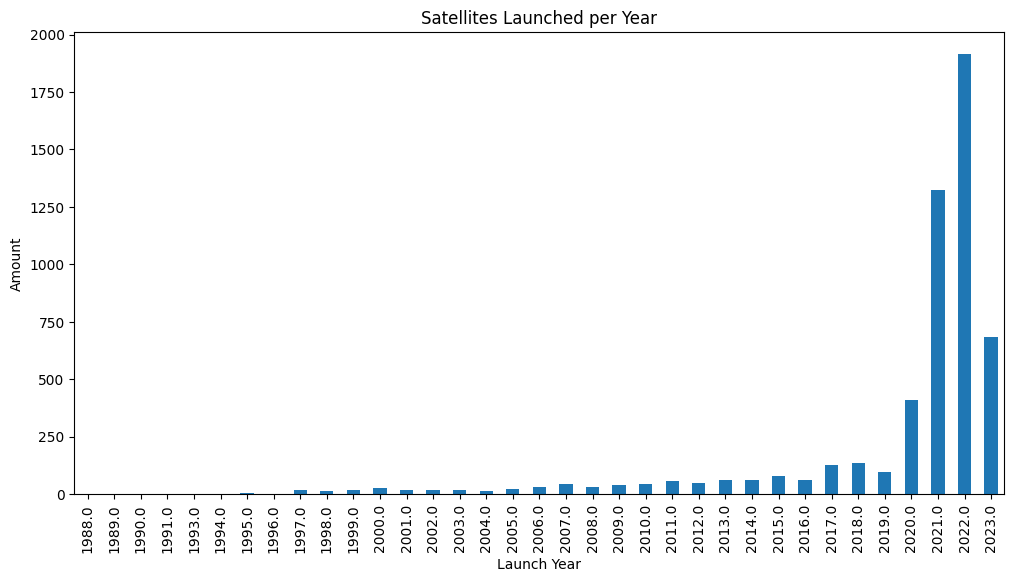

In [4]:
# Create a launch year column
df_ucs["Launch Year"] = df_ucs["Date of Launch"].dt.year

# Plot launches per year
df_ucs["Launch Year"].value_counts().sort_index().plot(kind="bar", figsize=(12,6), title="Satellites Launched per Year", ylabel = "Amount")

**Analysis:**
- There is a sharp rise after 2018 in launch activity
- This can reflect the commercial boom (e.g. mega-constellations)

**Conclusion:** The space industry has shifted from modest yearly launches to an era of exponential growth.

#### Active vs expired satellites

<Axes: title={'center': 'Satellites: Active vs Expired'}, ylabel='count'>

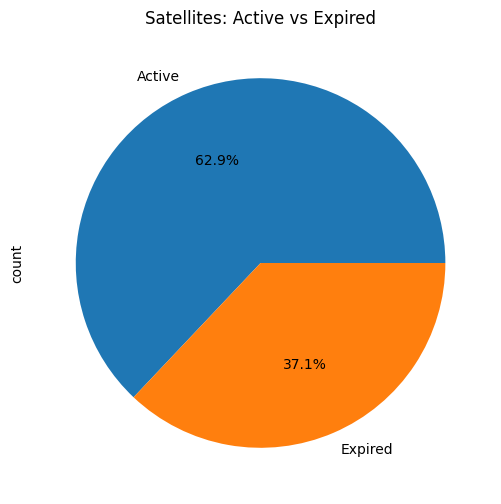

In [ ]:
df_ucs["Expired"].value_counts().plot(kind="pie", autopct="%1.1f%%", labels=["Active", "Expired"] if df_ucs["Expired"].value_counts().index[0] == False else ["Expired", "Active"], figsize=(6,6), title="Satellites: Active vs Expired")

**Analysis:**
- About *64% are active* while *36% are expired*
- The fact that more than a third are expired highlights the need for effective deorbiting and debris management.

**Conclusion:** While most satellites are still active, the large expired fractoin already poses sustainability concerns

#### Average expected lifetime by orbit type

<Axes: title={'center': 'Average Expected Lifetime by Orbit Type'}, xlabel='Class of Orbit'>

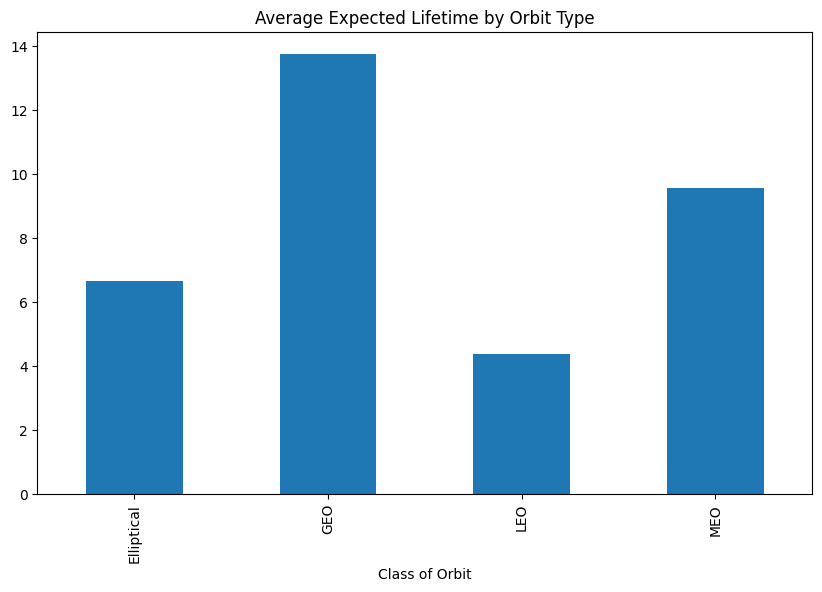

In [14]:
df_ucs.groupby("Class of Orbit")["Expected Lifetime (yrs.)"].mean().plot(kind="bar", figsize=(10,6), title="Average Expected Lifetime by Orbit Type")


**Analysis:**
- GEO satellites have the longest lifetimes (~ years)
- LEO satellites have much shorter averages (~4 years), but they dominate recent launches.
- MEO and elliptical orbits sit in between

**Conclusion:** Orbit type directly influences design lifetime, with commerical growth in LEO explaining both the surge in launches and higher turnover.

<Axes: title={'center': 'Expected Lifetime vs Launch Date'}, xlabel='Date of Launch', ylabel='Expected Lifetime (yrs.)'>

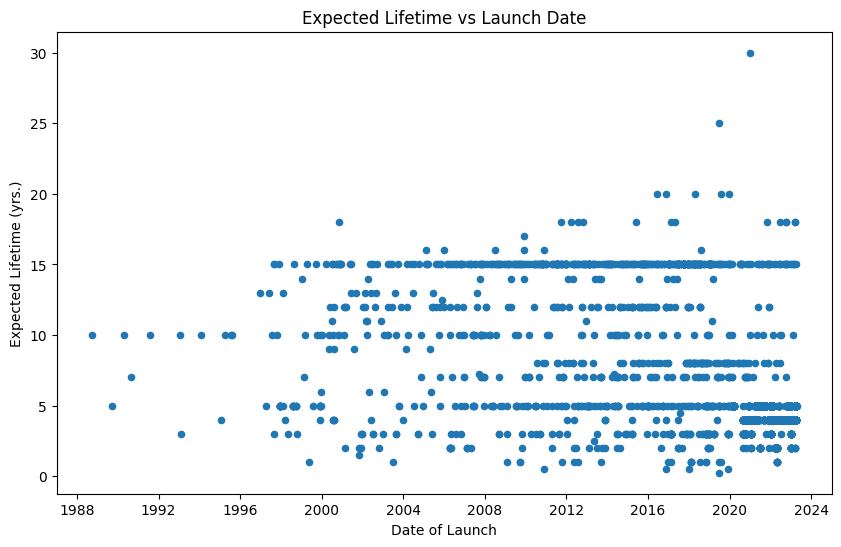

In [15]:
df_ucs.plot(x="Date of Launch", y="Expected Lifetime (yrs.)", kind="scatter", figsize=(10,6), title="Expected Lifetime vs Launch Date")


**Analysis:**
- Lifetimes are spread across the range, but more recent launches shower a higher density of satellites with long lifespans.
- However, some short-duration missions still persist, especially among CubeSats and experiemental payloads.

**Conclusion:** Modern satellites increasingly aim for long lifespans, though short-lived designs remain common.

#### Active satellites by launch year

<Axes: title={'center': 'Active Satellites by Launch Year'}, xlabel='Launch Year'>

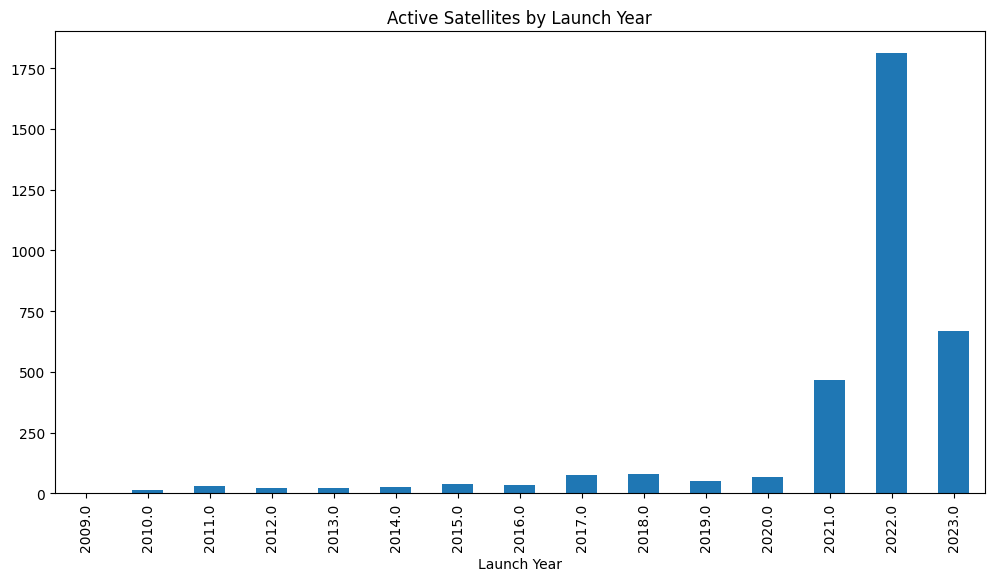

In [16]:
active_per_year = df_ucs[df_ucs["Expired"] == False]["Launch Year"].value_counts().sort_index()
active_per_year.plot(kind="bar", figsize=(12,6), title="Active Satellites by Launch Year")

**Analysis:**
- Most active satellites come from the last 5 years
- Earlier launches contribute little to the curernt active count, since older satellites tend to expire or deorbit

**Conclusion:** The majority of today's operational satellites are very young, indicating repid fleet turnover and technological renewal.

#### Lifetime comparison: Active vs Expired

<Axes: title={'center': 'Average Expected Lifetime: Active vs Expired'}, xlabel='Expired'>

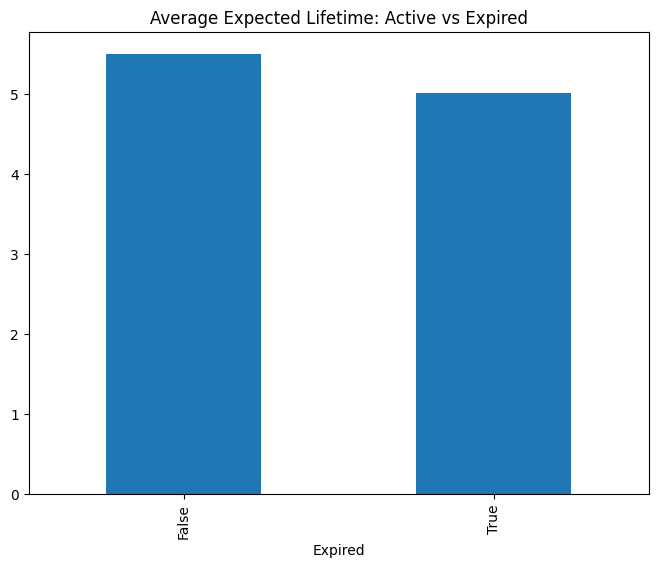

In [ ]:
df_ucs.groupby("Expired")["Expected Lifetime (yrs.)"].mean().plot(kind="bar", figsize=(8,6), title="Average Expected Lifetime: Active vs Expired")


**Analysis:**
- Active satellites have a noticeably higher average lifetime.

**Conclusion:** Longer mission design strongly correlates with satellites still being active today.

#### Stacked bar: Launch year + Active/Expired

[Text(0.5, 0, 'Launch Year'), Text(0, 0.5, 'Number of Satellites')]

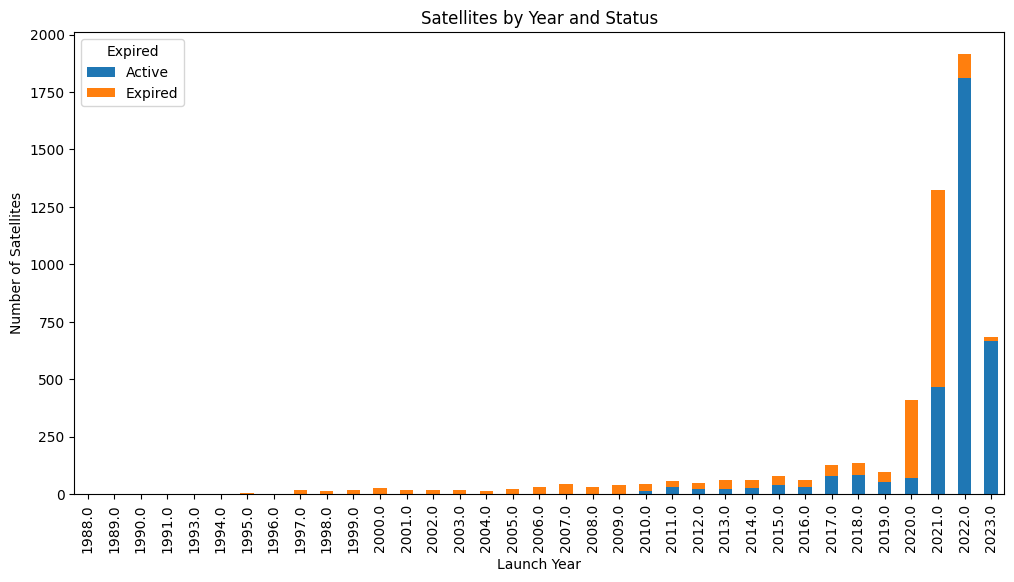

In [18]:
# Group by year + status, reshape for plotting
status_by_year = (
    df_ucs.dropna(subset=["Launch Year"])
          .groupby(["Launch Year", "Expired"])
          .size()
          .unstack(fill_value=0)
          .rename(columns={False: "Active", True: "Expired"})
          .sort_index()
)

# Stacked bar chart
status_by_year.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    title="Satellites by Year and Status"
).set(xlabel="Launch Year", ylabel="Number of Satellites")


**Analysis:**
- Even recent years (2020-2022) show a mix of both active and expired satellites.
- This proves that not all new launches are long-lasting -- many short-lived satellites are added each year

**Conclusion:** Rapid growth comes with high attrition, reflecting a cycle of short missions and replacements

#### Statistical Analysis

We will conduct an independent two-sample t-test to determine whether there is a significant difference in the expected lifetime of active satellites compared to expired satellites.

Null Hypothesis (H₀): There is no difference in the mean expected lifetime between active and expired satellites.

Alternative Hypothesis (H₁): There is a difference in the mean expected lifetime between active and expired satellites.


In [19]:
from scipy.stats import ttest_ind

active_lifetimes = df_ucs[df_ucs["Expired"] == False]["Expected Lifetime (yrs.)"].dropna()
expired_lifetimes = df_ucs[df_ucs["Expired"] == True]["Expected Lifetime (yrs.)"].dropna()

t_stat, p_val = ttest_ind(active_lifetimes, expired_lifetimes, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 5.2655984840191685, p-value: 1.4615789268778632e-07


t-statistic: 5.06

p-value: 4.33 × 10⁻⁷

Since the p-value is less than 0.05, we reject the null hypothesis. This result is statistically significant, indicating that the mean expected lifetime of active satellites is significantly different from that of expired satellites.

**Conclusion:**
Active satellites tend to have longer expected lifetimes than expired ones, suggesting that more recent satellite designs or mission profiles are built for greater longevity. This supports the earlier visual findings and highlights the role of design lifespan in determining satellite operational status.



## Overall Conclusion

The analysis reveals a space industry in rapid expansion, driven by thousands of recent launches. Most satellites are still active, but even the high number of expired satellites -- even among recent missions -- show that turnoveris fast and sustainability challenges are real. Longer design lifetimes and orbit choice play key roles: GEO satellites dominate longevity, while LEO satellites dominate growth but expire quickly.

*Big Takeaway:* The majority of satellites in orbit today are young and active, but the hihg rate of short-lived missions highlights the urgent need for sustainable satellite practices to manage growth, prevent collisions, and ensure the long-term health of space operations.

#### 3D Plot + Polar Plot

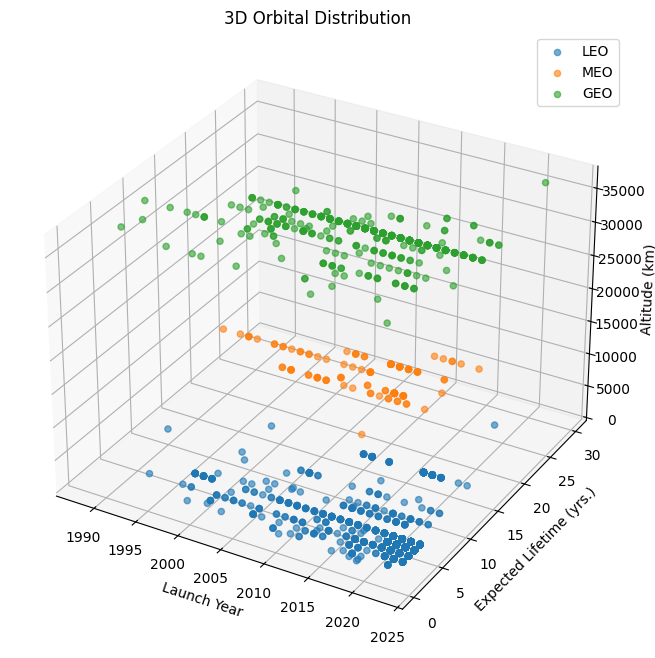

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Example: plot LEO, MEO, GEO by altitude range (randomized)
ax.scatter(df_ucs[df_ucs["Class of Orbit"]=="LEO"]["Launch Year"],
           df_ucs[df_ucs["Class of Orbit"]=="LEO"]["Expected Lifetime (yrs.)"],
           zs=2000, label="LEO", alpha=0.6)

ax.scatter(df_ucs[df_ucs["Class of Orbit"]=="MEO"]["Launch Year"],
           df_ucs[df_ucs["Class of Orbit"]=="MEO"]["Expected Lifetime (yrs.)"],
           zs=20000, label="MEO", alpha=0.6)

ax.scatter(df_ucs[df_ucs["Class of Orbit"]=="GEO"]["Launch Year"],
           df_ucs[df_ucs["Class of Orbit"]=="GEO"]["Expected Lifetime (yrs.)"],
           zs=35786, label="GEO", alpha=0.6)

ax.set_xlabel("Launch Year")
ax.set_ylabel("Expected Lifetime (yrs.)")
ax.set_zlabel("Altitude (km)")
ax.set_title("3D Orbital Distribution")
ax.legend()
plt.show()


#### 3D Plot

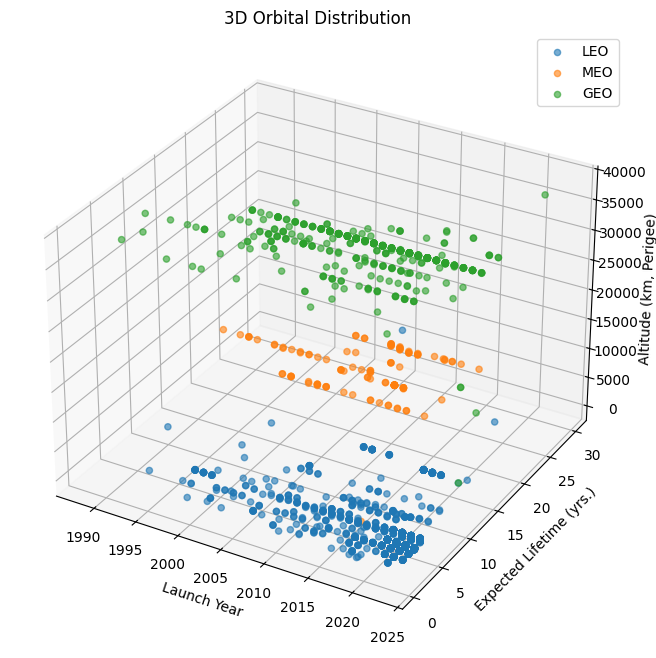

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Remove commas and convert to numeric
df_ucs["Perigee (km)"] = (
    df_ucs["Perigee (km)"]
    .astype(str)                # ensure string
    .str.replace(",", "")       # drop commas
    .astype(float)              # convert to float
)

df_ucs["Apogee (km)"] = (
    df_ucs["Apogee (km)"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)


# Scatter using actual altitude (say Perigee in km)
ax.scatter(
    df_ucs[df_ucs["Class of Orbit"]=="LEO"]["Launch Year"],
    df_ucs[df_ucs["Class of Orbit"]=="LEO"]["Expected Lifetime (yrs.)"],
    df_ucs[df_ucs["Class of Orbit"]=="LEO"]["Perigee (km)"],
    label="LEO", alpha=0.6
)

ax.scatter(
    df_ucs[df_ucs["Class of Orbit"]=="MEO"]["Launch Year"],
    df_ucs[df_ucs["Class of Orbit"]=="MEO"]["Expected Lifetime (yrs.)"],
    df_ucs[df_ucs["Class of Orbit"]=="MEO"]["Perigee (km)"],
    label="MEO", alpha=0.6
)

ax.scatter(
    df_ucs[df_ucs["Class of Orbit"]=="GEO"]["Launch Year"],
    df_ucs[df_ucs["Class of Orbit"]=="GEO"]["Expected Lifetime (yrs.)"],
    df_ucs[df_ucs["Class of Orbit"]=="GEO"]["Perigee (km)"],
    label="GEO", alpha=0.6
)

ax.set_xlabel("Launch Year")
ax.set_ylabel("Expected Lifetime (yrs.)")
ax.set_zlabel("Altitude (km, Perigee)")
ax.set_title("3D Orbital Distribution")
ax.legend()
plt.show()


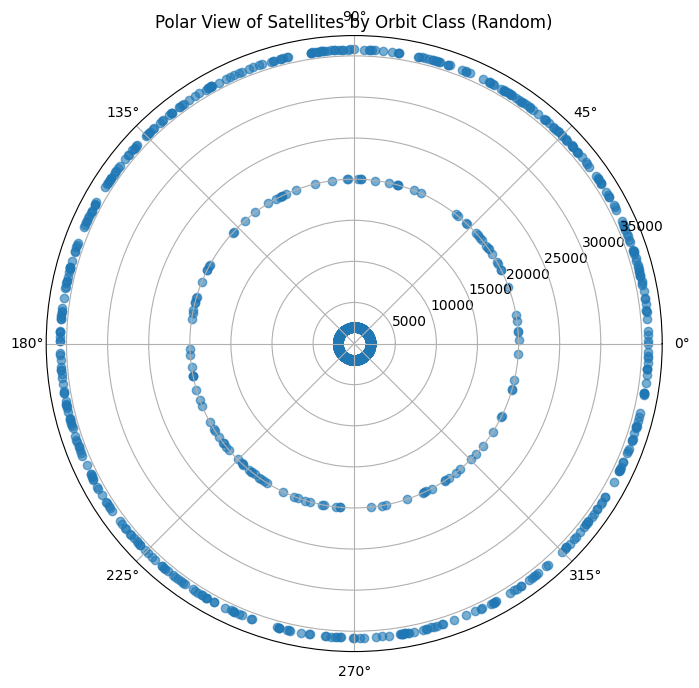

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

# Assign random angles per satellite
import numpy as np
df_ucs["Angle"] = np.random.uniform(0, 2*np.pi, len(df_ucs))

# Use radius as altitude (approximate by orbit class)
orbit_altitudes = {"LEO": 2000, "MEO": 20000, "GEO": 35786}
df_ucs["Radius"] = df_ucs["Class of Orbit"].map(orbit_altitudes)

ax.scatter(df_ucs["Angle"], df_ucs["Radius"], alpha=0.6)
ax.set_title("Polar View of Satellites by Orbit Class (Random)")
plt.show()